In [1]:
import numpy as np
import matplotlib.pyplot as plt

from Dosepy import image
from Dosepy.tools.gamma import chi

In [2]:
# Load film and dcm array form csv
path_to_film = "/media/luis/TOMO/Dosepy/gamma_testing/film_dose_map.csv"
path_to_dcm = "/media/luis/TOMO/Dosepy/gamma_testing/dcm_dose_map.csv"

film_array = np.genfromtxt(path_to_film, delimiter=",")
dcm_array = np.genfromtxt(path_to_dcm, delimiter=",")

print(film_array.shape)
print(dcm_array.shape)

(590, 590)
(200, 200)


In [3]:
film = image.ArrayImage(film_array, dpi=75)
dcm = image.ArrayImage(dcm_array, dpi=25.4)

In [4]:
# Equate resolution

film.reduce_resolution_as(dcm)

film_reduced = image.ArrayImage(film.array[50:130, 40: 160], dpi=25.4)
dcm_reduced = image.ArrayImage(dcm.array[50:130, 40: 160], dpi=25.4)

In [5]:
g, p = film_reduced.gamma2D(dcm_reduced, 3, 2)

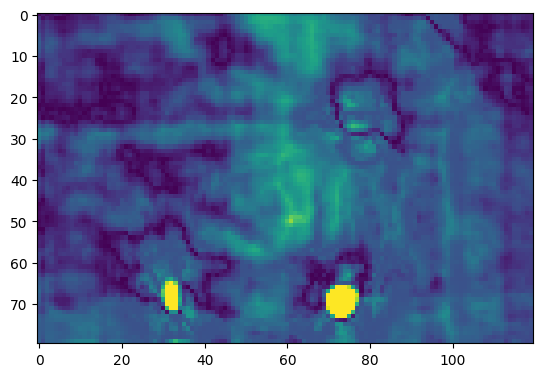

In [6]:
plt.imshow(g, vmax=2)

In [7]:
# Passing rate
p

np.float64(94.39583333333333)

99.01041666666667


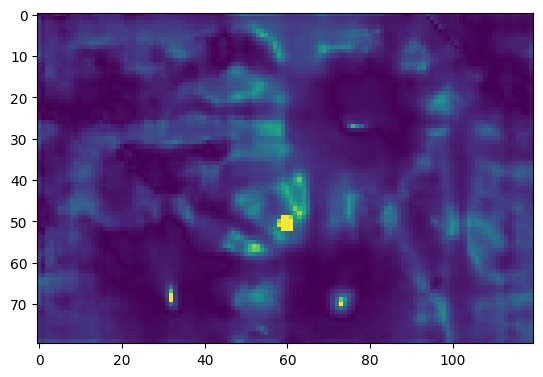

In [8]:
# Calculate Chi

chi_map, chi_rate = chi(
    reference_image = dcm_reduced,
    comparison_image = film_reduced,
    doseTA = 2,
    distTA = 1,
)
plt.imshow(chi_map, vmax=2, )
print(chi_rate)

In [9]:
print(chi_rate)

99.01041666666667


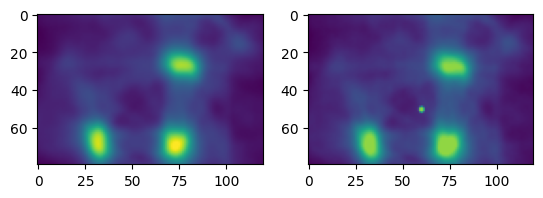

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.imshow(dcm_reduced.array, vmax=15)
ax2.imshow(film_reduced.array, vmax=15)

In [36]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        z=chi_map,
        zmin=0,
        zmax=3,
        colorscale=[
            [0, "rgb(255, 255, 250)"],
            [0.333, "rgb(200, 200, 200)"],

            [0.333, "rgb(150, 20, 150)"],
            [1, "rgb(0, 20, 0)"],
        ],
        
        #colorbar=dict(
        #    tick0=0,
        #    dtick=1,
        #),
    ),
)
#fig.update_yaxes(autorange=False)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'colorscale': [[0, 'rgb(255, 255, 250)'], [0.333, 'rgb(200, 200,
                             200)'], [0.333, 'rgb(150, 20, 150)'], [1, 'rgb(0, 20,
                             0)']],
              'type': 'heatmap',
              'z': {'bdata': ('agWva7OesD+JfemHikK7P4IWnuS4Br' ... '6bTIgu2z9rOWx/9LXbP4HGjp/AIeE/'),
                    'dtype': 'f8',
                    'shape': '80, 120'},
              'zmax': 3,
              'zmin': 0}],
    'layout': {'template': '...'}
})

In [22]:
px.imshow(chi_map, zmax=3)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>color: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'xaxis': 'x',
              'yaxis': 'y',
              'z': {'bdata': ('agWva7OesD+JfemHikK7P4IWnuS4Br' ... '6bTIgu2z9rOWx/9LXbP4HGjp/AIeE/'),
                    'dtype': 'f8',
                    'shape': '80, 120'}}],
    'layout': {'coloraxis': {'cmax': 3,
                             'cmin': np.float64(1.6310325775718516e-05),
                             'colorscale': [[0.0, '#0d0887'], [0.1111111111111111,
                                            '#46039f'], [0.2222222222222222,
                                            '#7201a8'], [0.3333333333333333,
                                            '#9c179e'], [0.4444444444444444,
                                            '#bd3786'], [0.5555555555555556,
                                            '#d8576b'], [0.6666666666666666,
                                            '#ed7953'], [0.7777777777777778,
                                            '#fb9f3a'], [0.8888888888888888,
                                            '#fdca26'], [1.0, '#f0f921']]},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'constrain': 'domain', 'domain': [0.0, 1.0], 'scaleanchor': 'y'},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'constrain': 'domain', 'domain': [0.0, 1.0]}}
})